In [ ]:
pip install tensorflow tensorflow-datasets

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import mean_squared_error

In [54]:
## Loading MNIST image data set
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

## Scaling all pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Reshaping the images to be a single vector
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))[0:10000,]
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))[0:1000,]

## Printing the shape of the data sets
print(X_train.shape)
print(X_test.shape)

(10000, 784)
(1000, 784)


In [55]:
## Defining the size of encoding vector
encoding_dim = 32

## Constructing the model
autoencoder = Sequential(name = 'Autoencoder')
autoencoder.add(Input(shape = (784), name = 'Input')) ## Input layer
autoencoder.add(Dense(encoding_dim, activation = 'relu', name = 'Encoder')) ## Encoder
autoencoder.add(Dense(784, activation = 'sigmoid', name = 'Decoder')) ## Decoder

## Compiling the model
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

## Printing a model summary
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Dense)             (None, 32)                25120     
                                                                 
 Decoder (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [56]:
## Fitting the model to the training data
autoencoder.fit(X_train, X_train, epochs = 20, batch_size = 32, shuffle = True, validation_data = (X_test, X_test))

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - val_loss: 0.1943
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1738 - val_loss: 0.1626
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1496 - val_loss: 0.1439
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1339 - val_loss: 0.1305
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1234 - val_loss: 0.1215
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1158 - val_loss: 0.1150
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1101 - val_loss: 0.1101
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1058 - val_loss: 0.1060
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1026 - val_loss: 0.1030
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1001 - val_loss: 0.1008

In [57]:
## Predicting on the testing set
preds = autoencoder.predict(X_test)

32/32 [==============================] - 0s 1ms/step


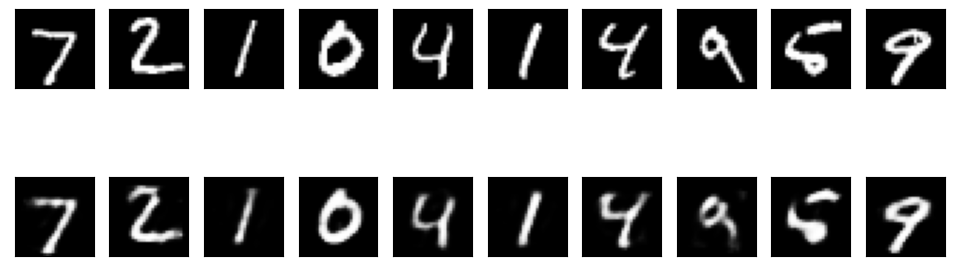

In [58]:
## Displaying some test images and their predictions

n = 10
plt.figure(figsize = (12, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape((28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(preds[i].reshape((28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [67]:
pd.DataFrame(X_test[0].flatten()).describe()

,0
count,784.000000
mean,0.092307
std,0.258913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [66]:
pd.DataFrame(preds[0].flatten()).describe()

# df_describe = pd.DataFrame('your np.array')
# df_describe.describe()

,0
count,7.840000e+02
mean,1.001384e-01
std,2.497603e-01
min,8.270681e-11
25%,5.005696e-06
50%,3.025843e-04
75%,9.580715e-03
max,9.847017e-01
